In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sigmf import sigmffile

plt.rcParams['figure.figsize'] = (7, 3.5)
plt.rcParams['figure.facecolor'] = 'w'

In [2]:
fs = 2.5e6
T = 100
N = round(T * fs)
ground = np.fromfile('/mnt/CNR_VOR_ground_2024-07-13.sigmf-data', 'int16', count=2*N).astype('float32').view('complex64') / 2**15
aircraft = np.fromfile('/mnt/CNR_VOR_aircraft_2024-07-13.sigmf-data', 'int16', count=2*N).astype('float32').view('complex64') / 2**15

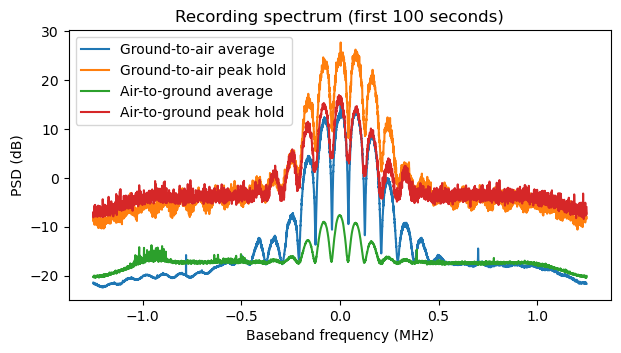

In [3]:
NFFT = 4096
faxis = np.fft.fftshift(np.fft.fftfreq(NFFT, 1/fs)) * 1e-6
for name, x in zip(['Ground-to-air', 'Air-to-ground'], [ground, aircraft]):
    f = np.fft.fftshift(np.abs(np.fft.fft(x[:x.size//NFFT*NFFT].reshape(-1, NFFT)))**2, axes=1)
    plt.plot(faxis, 10*np.log10(np.average(f, axis=0)), label=f'{name} average')
    plt.plot(faxis, 10*np.log10(np.max(f, axis=0)), label=f'{name} peak hold')
    del f
plt.legend()
plt.xlabel('Baseband frequency (MHz)')
plt.ylabel('PSD (dB)')
plt.title(f'Recording spectrum (first {T} seconds)');

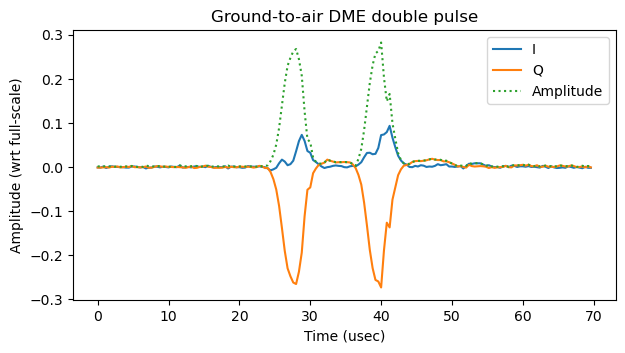

In [4]:
a = np.argmax(np.abs(ground))
span = 100
delta = 25
sel = slice(a - span, a + span - delta)
taxis = np.arange(sel.stop - sel.start) / fs * 1e6
plt.plot(taxis, ground[sel].real, label='I')
plt.plot(taxis, ground[sel].imag, label='Q')
plt.plot(taxis, np.abs(ground[sel]), ':', label='Amplitude')
plt.legend()
plt.xlabel('Time (usec)')
plt.ylabel('Amplitude (wrt full-scale)')
plt.title('Ground-to-air DME double pulse');

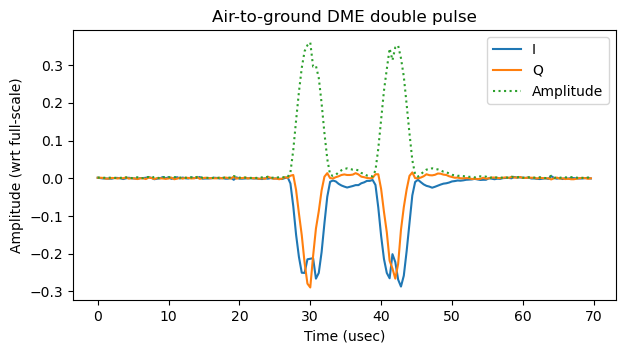

In [5]:
a = np.argmax(np.abs(aircraft))
span = 100
delta = 25
sel = slice(a - span + delta, a + span)
taxis = np.arange(sel.stop - sel.start) / fs * 1e6
plt.plot(taxis, aircraft[sel].real, label='I')
plt.plot(taxis, aircraft[sel].imag, label='Q')
plt.plot(taxis, np.abs(aircraft[sel]), ':', label='Amplitude')
plt.legend()
plt.xlabel('Time (usec)')
plt.ylabel('Amplitude (wrt full-scale)')
plt.title('Air-to-ground DME double pulse');

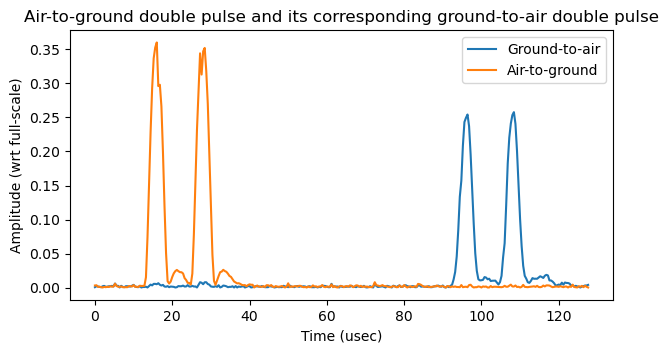

In [6]:
sel = slice(a - 40, a + 280)
taxis = np.arange(sel.stop - sel.start) / fs * 1e6
plt.plot(taxis, np.abs(ground[sel]), label='Ground-to-air')
plt.plot(taxis, np.abs(aircraft[sel]), label='Air-to-ground')
plt.legend()
plt.xlabel('Time (usec)')
plt.ylabel('Amplitude (wrt full-scale)')
plt.title('Air-to-ground double pulse and its corresponding ground-to-air double pulse');

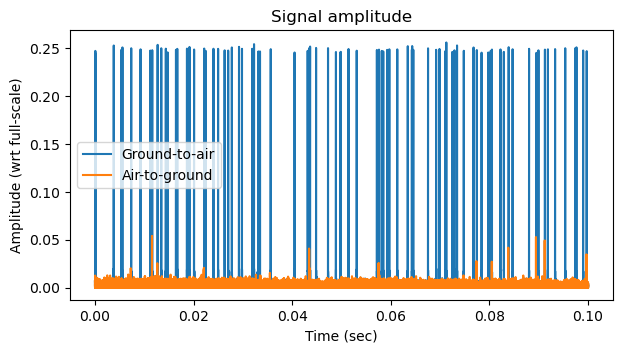

In [7]:
M = 250000
for name, x in zip(['Ground-to-air', 'Air-to-ground'], [ground, aircraft]):
    plt.plot(np.arange(M) / fs, np.abs(x[:M]), label=name)
    plt.xlabel('Time (sec)')
    plt.ylabel('Amplitude (wrt full-scale)')
    plt.title('Signal amplitude')
plt.legend();

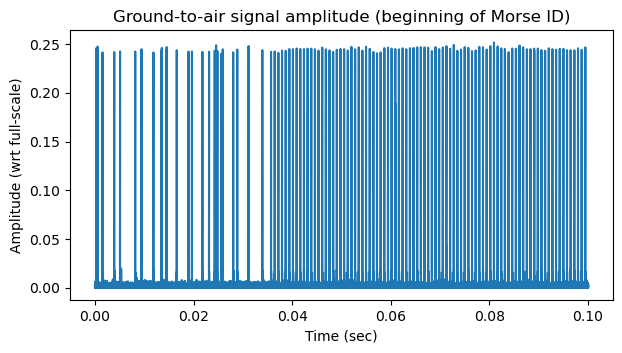

In [8]:
in_cw = round(15.5 * fs)
sel = slice(in_cw, in_cw + 250000)
plt.plot(np.arange(sel.stop - sel.start) / fs, np.abs(ground[sel]), label=name)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (wrt full-scale)')
plt.title('Ground-to-air signal amplitude (beginning of Morse ID)');